<a href="https://colab.research.google.com/github/NimishMalhotra/PokemonClassification/blob/master/Data_Augmentation(ImgAug).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install imgaug

In [1]:
from imgaug import augmenters as iaa

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


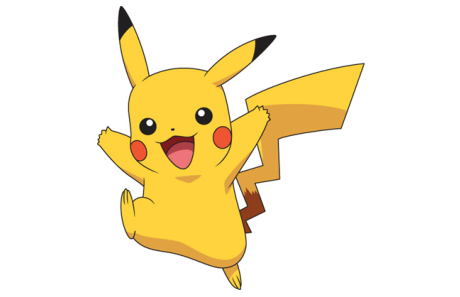

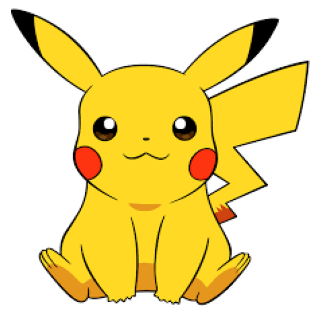

In [4]:
plt.style.use('seaborn')
plt.axis('off')
img1 = image.load_img("Pikachu_3.jpg")
img1 = image.img_to_array(img1)/255.0
plt.imshow(img1)
plt.show()
img2 = image.load_img("pikachu.png")
img2 = image.img_to_array(img2)/255.0
plt.axis('off')
plt.imshow(img2)
plt.show()

In [27]:
# Data Augmentation

seq = iaa.Sequential([
    iaa.Crop(px=(0,16)), # Crop Image from each side by 0 to 16 pixels (randomly chosen) 
    iaa.Fliplr(0.5), # horizontally flip 50% of the images. 
    #iaa.GaussianBlur(sigma=(0,3.0)), # blur images with sigma of 0 to 3.0
    #iaa.LinearContrast((0.75,1.5)),
    iaa.Affine(
        scale = {"x" : ( 0.8 , 1.2 ) , "y" : ( 0.8 , 1.2 ) },  # zoom in or zoom out
        translate_percent = {"x" : ( -0.2 , 0.2 ) , "y" : ( -0.2 , 0.2 ) },  # translating the image left right or up down
        rotate = (-25,25),
        shear = (-8,8)
    ),
    iaa.PiecewiseAffine(scale=(0.01,0.05))
 ])

In [13]:
# This seq object will generate images when you will give it some data.
batch = np.array([img1,img2])
print(batch.shape)

(2,)


In [14]:
img1.shape

(400, 630, 3)

In [15]:
img2.shape

(223, 226, 3)

In [7]:
batch = img1.reshape((1,*img1.shape))
batch.shape

(1, 400, 630, 3)

In [17]:
# Pass this batch of 1 image to sequence object

output = seq(images=batch) # This seq object applies the augmentation on the images in the batch that we had specified

In [19]:
print(output.shape) # 1 image

(1, 400, 630, 3)


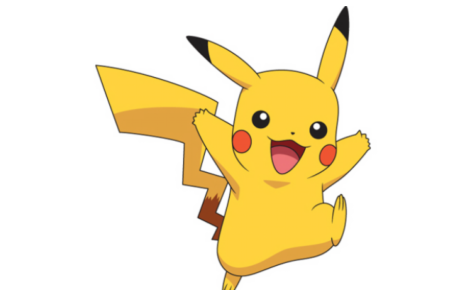

In [22]:
plt.imshow(output[0])  # 0th image in output array
plt.axis('off')
plt.show()

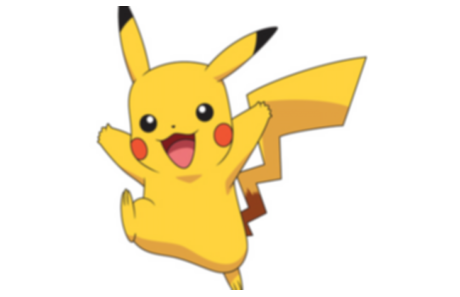

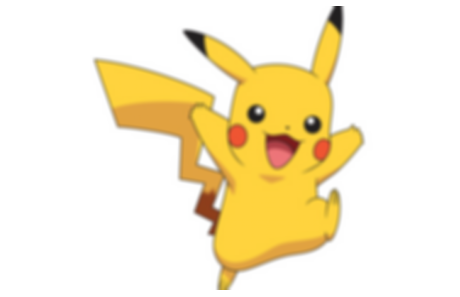

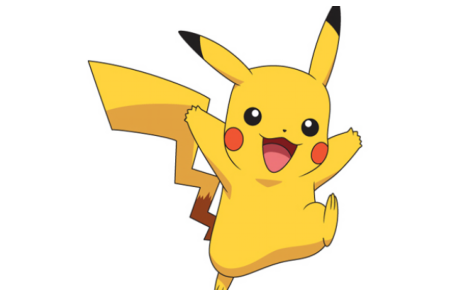

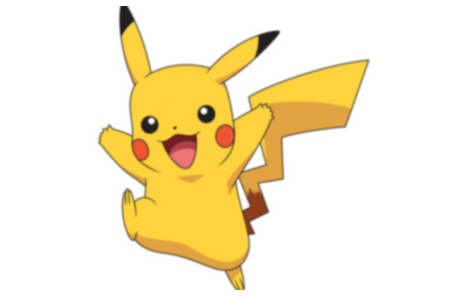

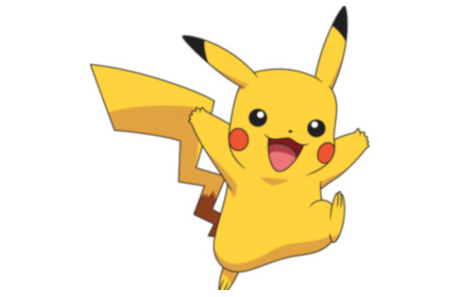

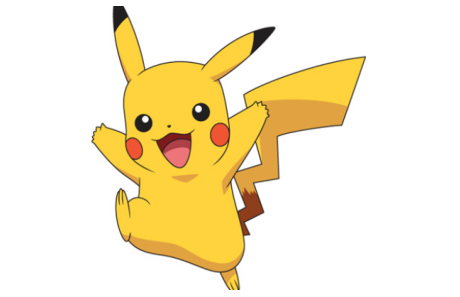

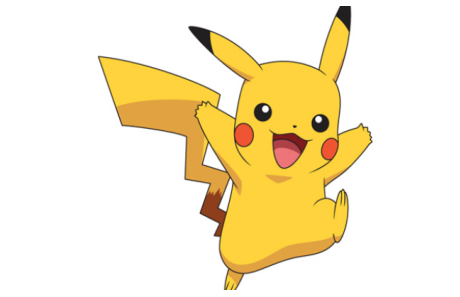

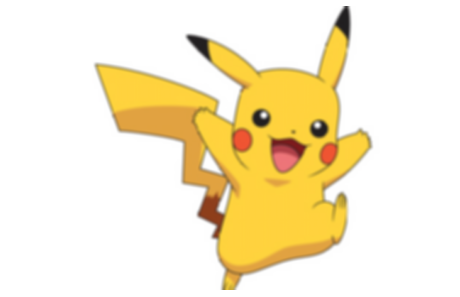

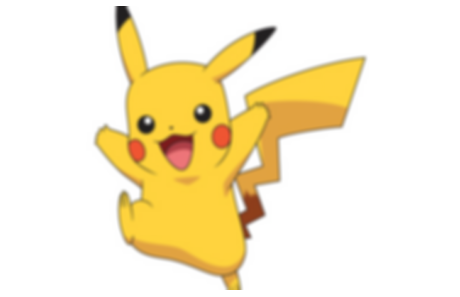

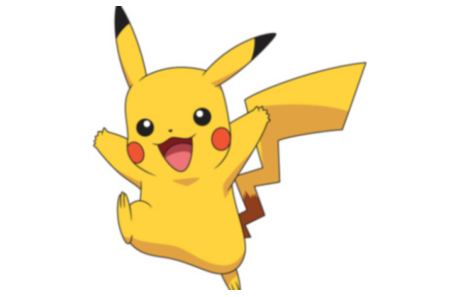

In [25]:
for i in range(10):
    output = seq(images=batch)
    plt.imshow(output[0])
    plt.axis('off')
    plt.show()

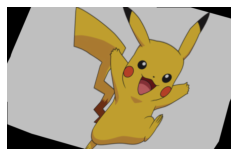

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


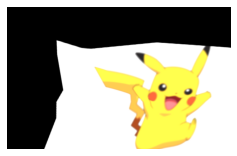

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


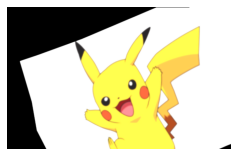

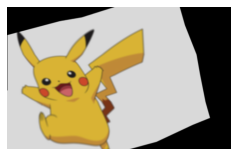

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


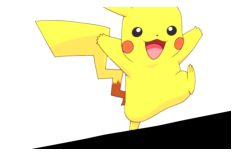

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


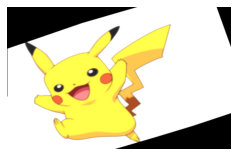

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


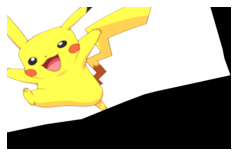

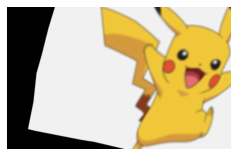

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


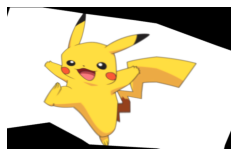

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


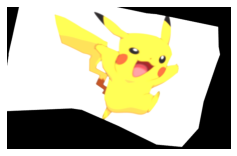

In [8]:
# Add some more augmentation like LinearContrast, Affine Transformation

for i in range(10):
    output = seq(images=batch)
    plt.figure(figsize=(4,4))
    plt.imshow(output[0])
    plt.axis('off')
    plt.show()

In [31]:
# Lets suppose we feed 20 images into batch each of size 100 X 100 X 3 then input shape => (20,100,100,3)
# Output shape will be after seq(images=batch) => (20,100,100,3), but everytime you execute this seq(images=batch) in each iteration of for loop different 20 images will be generated
# Output will 20 variants of 20 input images.
# You can also add noise to the seq object that will make our model more robust.
# For more details go to imgaug library documentation.
# For 1 image in  1 epoch we will have only 1 variant.
# PieceWise Affine for local distortions, diff distortions on diff parts of image, not a single distortion on entire image.
# Adding noise helps to prevent overfitting.

In [ ]:
# Try to work with a dataset

!wget https://www.dropbox.com/sh/dcu81abccge3hsr/AAAtm7aIwSZY78scu6e222NGa?dl=0

In [10]:
# Load data in batches.
# We will not load the entire dataset into the RAM because of memory constraints.
# We will use Data Generator. It will load data on the fly/runtime.(when it is required)

In [11]:
!ls

'AAAtm7aIwSZY78scu6e222NGa?dl=0'   Pikachu_3.jpg   pikachu.png	 sample_data


In [12]:
# Rename the file downloaded from dropbox using move command(in linux)
# Movve the file from here to here only but with a diff name

!mv AAAtm7aIwSZY78scu6e222NGa?dl=0 Pokedata.zip


In [13]:
!ls

Pikachu_3.jpg  pikachu.png  Pokedata.zip  sample_data


In [14]:
# The format for Keras Data Loader is that all images belonging to one class should be clubbed into 1 folder.
# If this is not met, then use os module of python to reorganize dataset such that it is according to Data Loader.

In [ ]:
!unzip Pokedata.zip

In [16]:
!ls

Pikachu_3.jpg  pikachu.png  Pokedata.zip  sample_data  Train  Val


In [17]:
import os

In [18]:
os.listdir("Train")

['Pikachu', 'Bulbasaur', 'Charmender']

In [19]:
os.listdir("Val")

['Pikachu', 'Bulbasaur', 'Charmender']

In [20]:
folders = os.listdir("Train") 
print("Training Dataset")
for f in folders:
    path = os.path.join("Train",f)
    print(f +" " + str(len(os.listdir(path))))

Training Dataset
Pikachu 101
Bulbasaur 101
Charmender 102


In [21]:
folders1 = os.listdir("Val")
print("Validation Dataset")
for f in folders1:
    path = os.path.join("Val",f)
    print(f + " " + str(len(os.listdir(path))))

Validation Dataset
Pikachu 40
Bulbasaur 41
Charmender 42


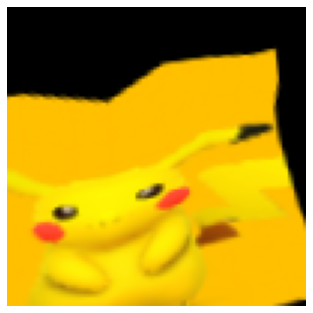

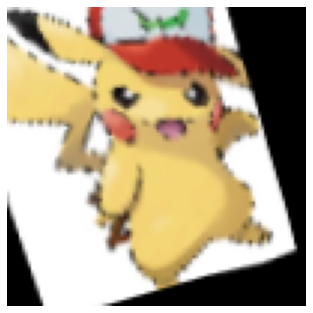

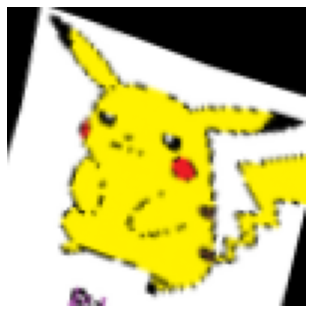

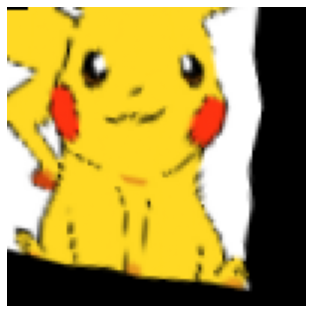

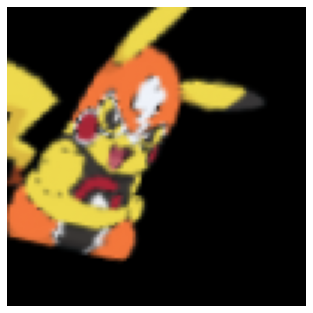

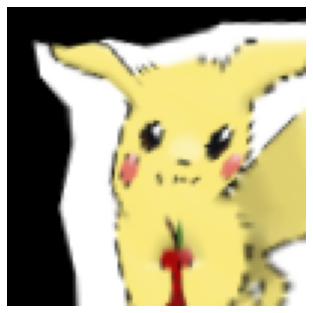

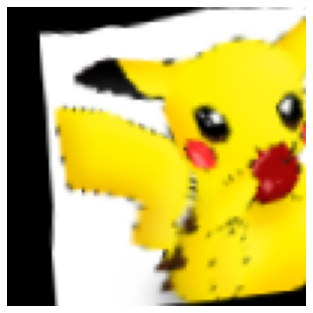

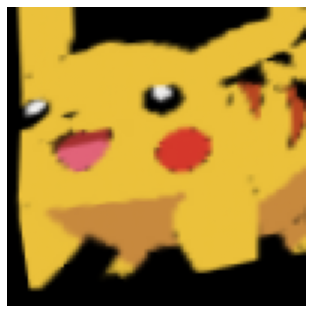

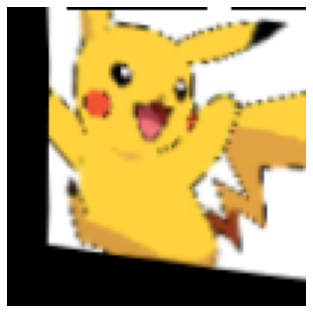

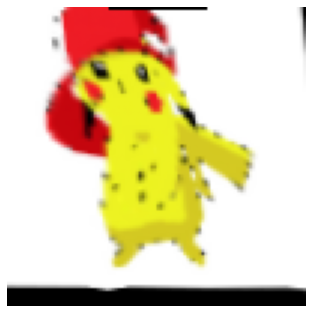

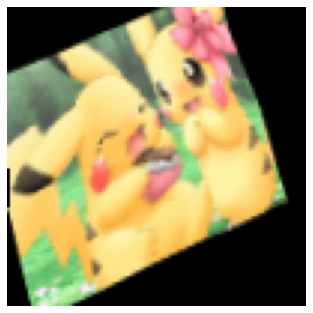

In [28]:
# Load the image data

train_path = "Train/Pikachu" 
for cnt,pic in enumerate(os.listdir(train_path)):
    img = image.load_img(os.path.join(train_path,pic),target_size=(100,100))  # Resize all the images to same size
    img = image.img_to_array(img)/255.0
    # Lets also add Augmentation in the image
    batch1 = img.reshape((1,*img.shape))
    output_img = seq(images=batch1)
    plt.imshow(output_img[0])
    plt.axis('off')
    plt.show()
    if cnt == 10:
        break 

In [29]:
# Remove blurring and LinearContrast because image size is already small

In [30]:
# Build a CNN Model in Keras
from keras.layers import *
from keras.models import Sequential
from keras.utils import to_categorical

In [34]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
#model.add(Flatten()) -> Global Average Pooling (GAP layer)
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)               

In [33]:
# GAP Layer (Global Average Pooling Layer)
# After the 3rd max pooling layer we have 64 feature maps each of size 10 X 10
# In a feature map (after the max pool layer) if a feature is detected, the map will have high values and if no feature is detected, the map will be almost filled with 0's.
# For each matrix, instead of taking the entire matrix we can take average of all the values of a matrix and you can make a scalar quantity out of it.
# Each matrix will be converted to one scalar quantity.
# For 64 feature maps we will have 64 scalar quantities.
# From a shape of (10,10,64) we can get just 64 output values.
# In earlier case the weight matrix would have been (6400,64). But after the GAP Layer this weight matrix will be of the shape (64,64). No. of neurons got reduced.
# Instead of using Flatten, we will use GAP Layer.
# The feature map which are highly activated, scalar values derived from them would be high.4
# For the maps which are less activated, you will get a less scalar value from those maps.
# For around 500 images using approx 0.45 million parameters will definitely result into overfitting.

In [35]:
# Compile the Model

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# **Data Preparation Using Keras** 



In [36]:
from keras.preprocessing.image import ImageDataGenerator

In [50]:
# Specify what operations to be applied on each image when it is loaded.

train_datagen = ImageDataGenerator(
    rescale = 1/255.0,                                # This will give us the normalised data
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

# No. of channels are still 3 , we need to specify the size of target_image and not the shape

train_generator = train_datagen.flow_from_directory("Train",batch_size=32,target_size=(100,100),class_mode='categorical',shuffle=True) 

Found 304 images belonging to 3 classes.


In [40]:
# So in this train_generator the full data of 304 images is not loaded
# When we iterate over the train_generator, the data will be loaded on the fly.
# train_generator is a generator function.
# This generator function will generate the data infinitely.
# It will everytime pick 32 images and return us.

In [41]:
for x,y in train_generator:
    print(x.shape,y.shape) # y is already one-hot vector
    break

(32, 100, 100, 3) (32, 3)


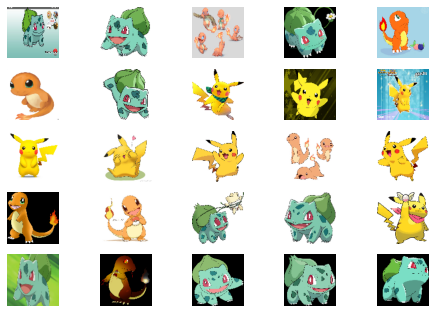

In [47]:
# Display first 25 images from the first batch of 32 images.
for x,y in train_generator:
    for i in range(25):
        plt.subplot(5,5,i+1)  # 5 rows and 5 columns
        img = x[i]
        img = img.reshape((100,100,3))  # Instead of dividing by 255.0 here mention while creating object of ImageDataGenerator
        plt.imshow(img)
        plt.axis('off')
    plt.show()
    break

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


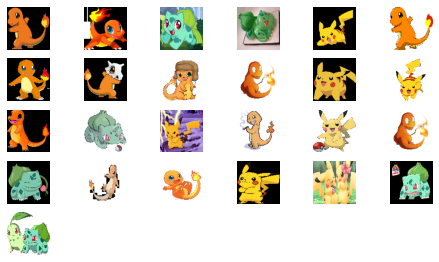

In [48]:
# Load and visualise the current batch of 32 images

for x,y in train_generator:
    for i in range(25):
        plt.subplot(6,6,i+1)    
        plt.imshow(x[i])
        plt.axis('off')
    plt.show()
    break

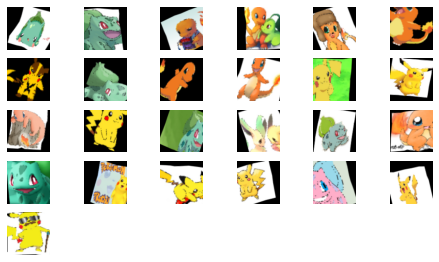

In [49]:
# We have not added any augmentation yet.
# There are 2 ways to add augmentation.
# 1st way of adding augmentation

for x,y in train_generator:
    x = seq(images=x)
    for i in range(25):
        plt.subplot(6,6,i+1)    
        plt.imshow(x[i])
        plt.axis('off')
    plt.show()
    break

In [ ]:
# 2nd way - Some simple augmentations are also given by Keras.
# While creating an object of ImageDataGenerator() specify augmentation to be applied on each image when it is loaded.

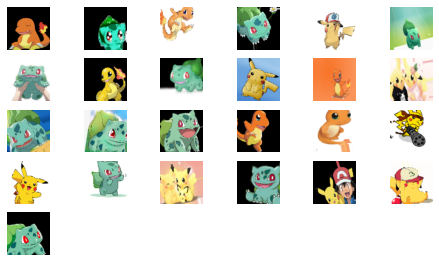

In [51]:
for x,y in train_generator:
    for i in range(25):
        plt.subplot(6,6,i+1)    
        plt.imshow(x[i])
        plt.axis('off')
    plt.show()
    break

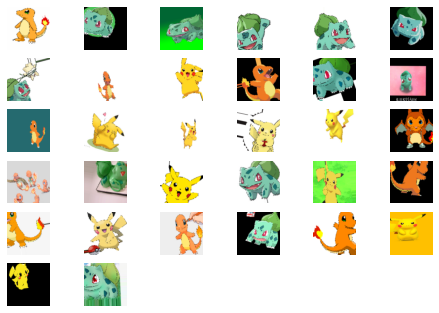

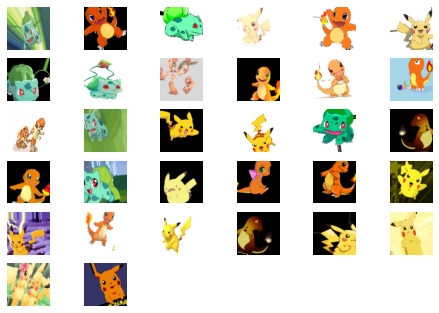

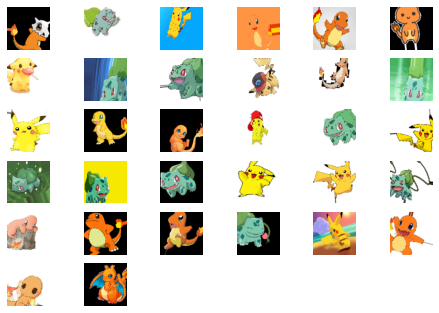

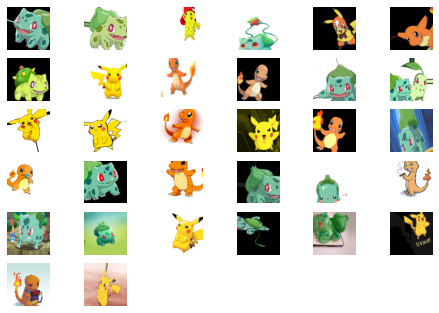

In [53]:
# Iterate over multiplt batches 

for cnt,(x,y) in enumerate(train_generator):
    for i in range(32):
        plt.subplot(6,6,i+1)    
        plt.imshow(x[i])
        plt.axis('off')
    plt.show()
    if cnt==3:
        break

In [54]:
# No augmentation is applied on validation data because that's like a test data.

val_datagen = ImageDataGenerator(rescale = 1.0/255)
val_generator = val_datagen.flow_from_directory('Val',batch_size=32,target_size=(100,100),class_mode='categorical',shuffle=True)

Found 123 images belonging to 3 classes.


In [55]:
train_generator.class_indices

{'Bulbasaur': 0, 'Charmender': 1, 'Pikachu': 2}

In [57]:
name2idx = dict(train_generator.class_indices)
idx2name = dict([(name2idx[key],key) for key in name2idx ])

In [58]:
print(name2idx)
print(idx2name)

{'Bulbasaur': 0, 'Charmender': 1, 'Pikachu': 2}
{0: 'Bulbasaur', 1: 'Charmender', 2: 'Pikachu'}


In [59]:
print(type(idx2name))

<class 'dict'>


In [60]:
# Another way - idx2name = dict((name2idx[k],k) for k in name2idx.keys())

In [61]:
hist = model.fit_generator(train_generator,epochs=50,steps_per_epoch=10,shuffle=True,validation_data=val_generator,validation_steps=4)

Epoch 1/50
 8/10 [=======================>......] - ETA: 2s - loss: 1.0626 - accuracy: 0.3875

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 12s 1s/step - loss: 1.0443 - accuracy: 0.4474 - val_loss: 0.9057 - val_accuracy: 0.6748
Epoch 2/50
10/10 [==============================] - 10s 1s/step - loss: 0.8128 - accuracy: 0.6546 - val_loss: 0.6424 - val_accuracy: 0.6341
Epoch 3/50
10/10 [==============================] - 10s 1s/step - loss: 0.6254 - accuracy: 0.6974 - val_loss: 0.6511 - val_accuracy: 0.6911
Epoch 4/50
10/10 [==============================] - 10s 1s/step - loss: 0.5462 - accuracy: 0.7566 - val_loss: 0.6894 - val_accuracy: 0.7154
Epoch 5/50
10/10 [==============================] - 10s 1s/step - loss: 0.5342 - accuracy: 0.7500 - val_loss: 0.4738 - val_accuracy: 0.8211
Epoch 6/50
10/10 [==============================] - 10s 1s/step - loss: 0.4270 - accuracy: 0.8355 - val_loss: 0.3934 - val_accuracy: 0.7886
Epoch 7/50
10/10 [==============================] - 10s 1s/step - loss: 0.3692 - accuracy: 0.8421 - val_loss: 0.3608 - val_accuracy: 0.8211
Epoch 8/50
10/10 [=============

In [ ]:
# Add dropouts to reduce overfitting.